### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [189]:
data = pd.read_csv('data/coupons.csv')

In [190]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [191]:
#Code to find if  dataset has null values
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [193]:
#find which columns have most nulls
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<Axes: ylabel='Frequency'>

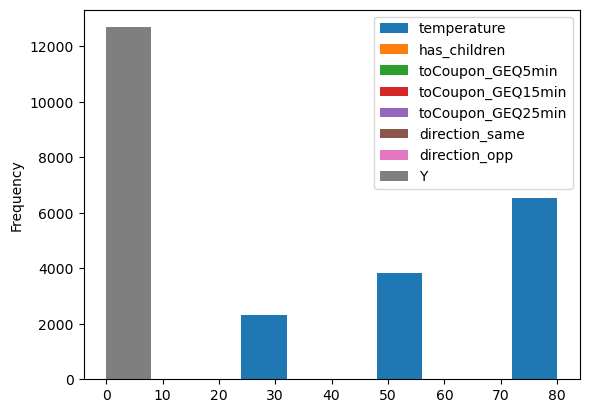

In [194]:
data.plot(kind='hist')

3. Decide what to do about your missing data -- drop, replace, other...

In [195]:
#get unique car values which are not null
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

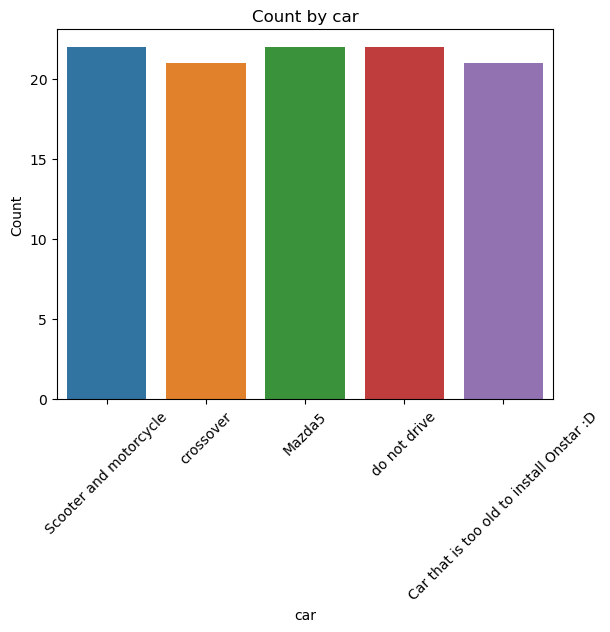

In [196]:
#plot car counts per type
fig = sns.countplot(x="car", data=data)
plt.xlabel("car")
plt.ylabel("Count")
plt.title("Count by car")
plt.xticks(rotation = 45)
plt.show(fig)


<Axes: >

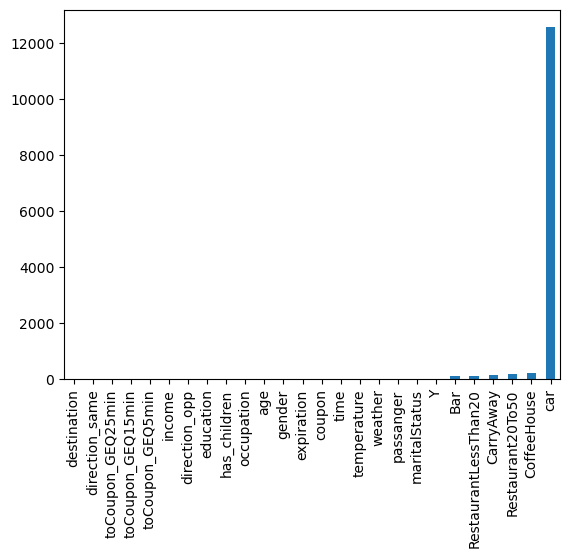

In [198]:
#visualize plot for null values in all columns
data.isnull().sum().sort_values().plot(kind = 'bar')

In [199]:
#get dataframe where car values are null
missing_car = data.loc[data['car'].isnull()]
missing_car

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [200]:
#fill data with non null values from another column, though not related
data['car']=data['car'].fillna(data['destination'])
#data['car']=data['car'].fillna('nocar')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


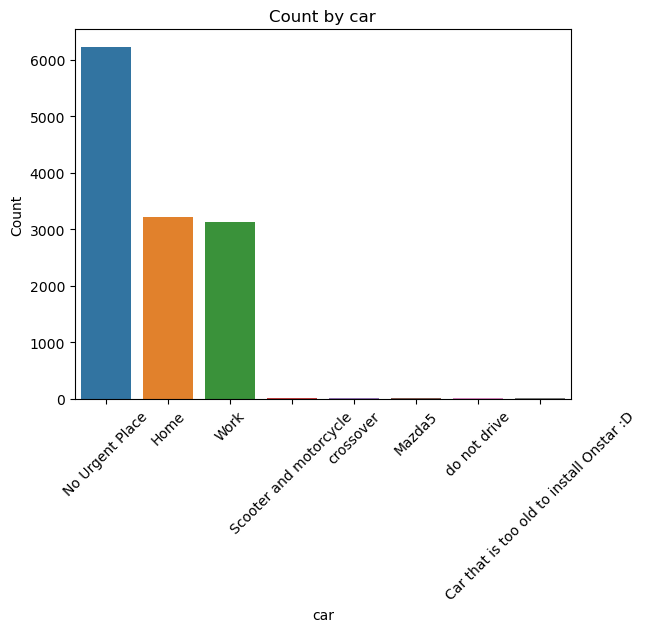

In [202]:
#plot for car values after replacing them with destination
fig = sns.countplot(x="car", data=data)
plt.xlabel("car")
plt.ylabel("Count")
plt.title("Count by car")
plt.xticks(rotation = 45)
plt.show(fig)

In [356]:
#clean the data for other columns which are non-null
clean_data = data.dropna(subset = ['Bar', 'RestaurantLessThan20','CarryAway','Restaurant20To50','CoffeeHouse'])
#print clean data and observer number of rows
clean_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [357]:
#calculate diff to make sure its not huge
data_diff = data.shape[0] - clean_data.shape[0]
data_diff

605

In [358]:
data.isnull().sum().value_counts()

0      21
107     1
217     1
151     1
130     1
189     1
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [205]:
#get data columns for easy reference 
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

array([[<Axes: title={'center': 'Y'}>]], dtype=object)

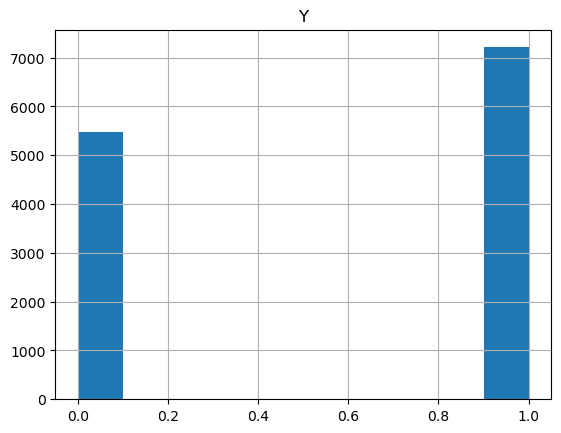

In [359]:
#get accepted yay / nay values for coupons
data.hist('Y')

In [360]:
#calculate accepted yay / nay ratio 
proportion = data.query("Y == 1" ).Y.count()/data.query("Y == 0" ).Y.count()
proportion

1.3171355498721227

5. Use a bar plot to visualize the `coupon` column.

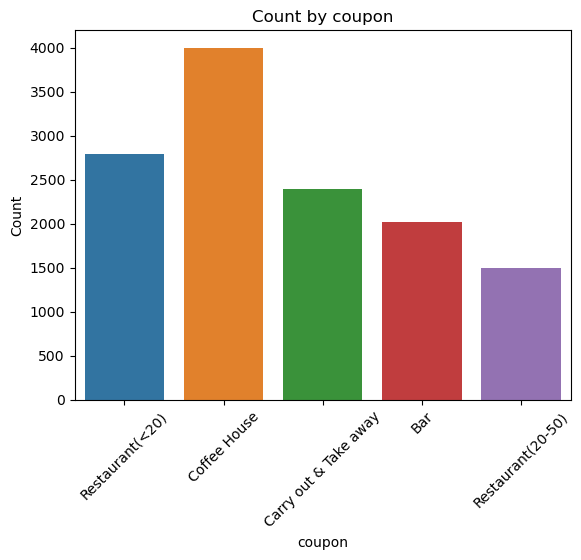

In [208]:
#visualize the type and count of coupons
figcoupon = sns.countplot(x="coupon", data=data)
plt.xlabel("coupon")
plt.ylabel("Count")
plt.title("Count by coupon")
plt.xticks(rotation = 45)
plt.show(figcoupon)

6. Use a histogram to visualize the temperature column.

<Axes: ylabel='Frequency'>

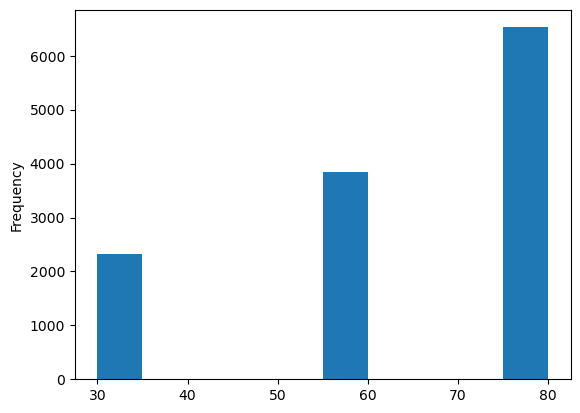

In [227]:
#visualize the temperature and count of temperatures on a day when coupon was presented
data['temperature'].plot(kind='hist')

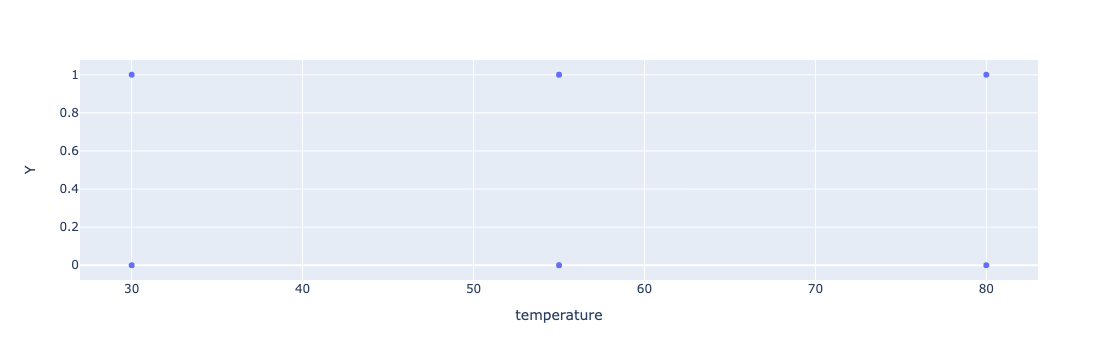

In [228]:
#visualize the temperature and count of temperatures on a day when coupon was presented as scatter plot - though not very helpful
px.scatter(data_frame=data, x = 'temperature', y = 'Y')



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [234]:
#Focus on analysis of data where coupons are for bar's
bar_data = data.query("coupon == 'Bar'")
bar_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [235]:
#Get ratio of accepted coupons for bar only
proportion_bar = bar_data.query("Y == 1" ).Y.count()/bar_data.query("Y == 0" ).Y.count()
proportion_bar

0.6949579831932773

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


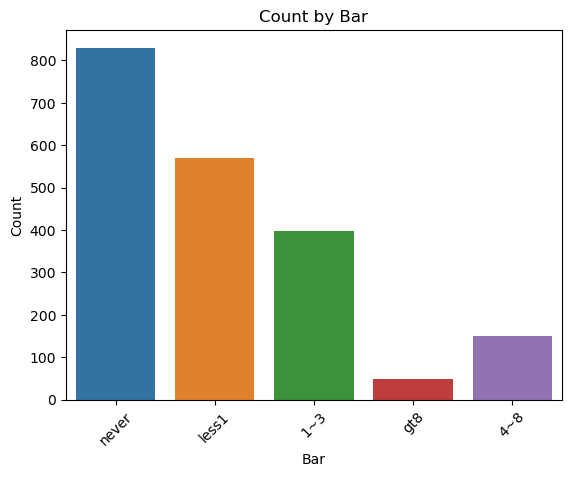

In [287]:
#visualize bar data per frequecy of visits to bar
fig = sns.countplot(x="Bar", data=bar_data)
plt.xlabel("Bar")
plt.ylabel("Count")
plt.title("Count by Bar")
plt.xticks(rotation = 45)
plt.show(fig)

In [288]:
#get unique values for queries to follow
bar_data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

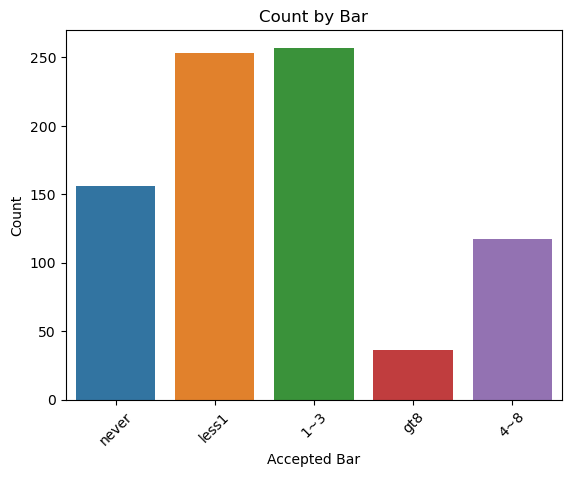

In [289]:
#get accepted coupons for bar and visualize the data using bar graph
accepted_bar = bar_data.query("Y == 1" )
accepted_bar

fig = sns.countplot(x="Bar", data=accepted_bar)
plt.xlabel("Accepted Bar")
plt.ylabel("Count")
plt.title("Count by Bar")
plt.xticks(rotation = 45)
plt.show(fig)

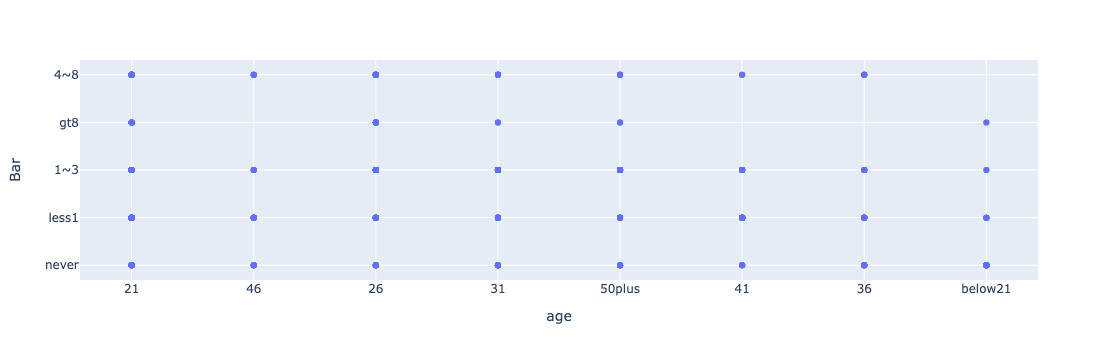

In [290]:
#look at data from another view as scatter plot for age and bar
px.scatter(accepted_bar, x = "age", y ="Bar")


In [291]:
#calcuate proportion of those who visited part 1-3 times as compared to others
proportion_bar_1TO3 = accepted_bar.query("Bar == '1~3'" ).Y.count()/ ((accepted_bar.query("Bar == '4~8'" ).Y.count()) + (accepted_bar.query("Bar == 'gt8'" ).Y.count()))
proportion_bar_1TO3

1.6797385620915033

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [292]:
#get unique values for age to be used in queries later
accepted_bar['age'].unique()

array(['21', '46', '26', '31', '50plus', '41', '36', 'below21'],
      dtype=object)

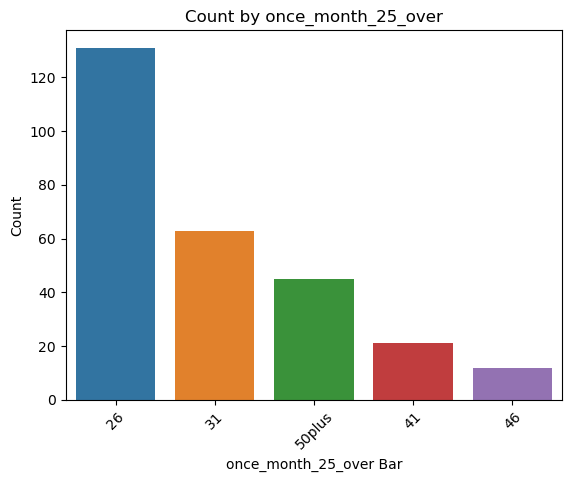

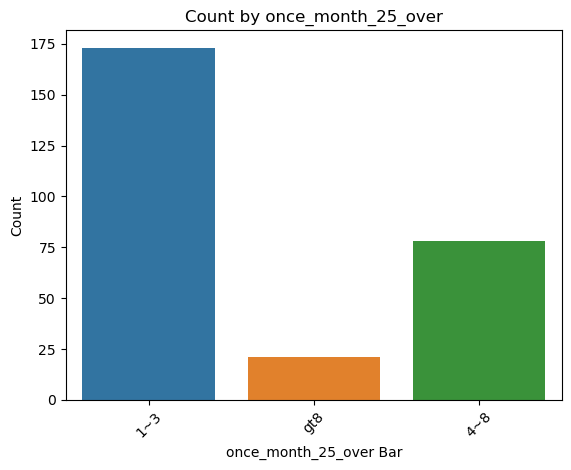

In [293]:
#create lists to be used in queries
list_of_bar = ["1~3","gt8","4~8"]
list_of_age = ["46","26","31","50plus","41"]

#get once a month data 
once_month = accepted_bar.query('Bar in @list_of_bar')

#get once a month data for folks over 25
once_month_25_over =  once_month.query('age in @list_of_age')

#visualize age for once_month_25_over 
fig = sns.countplot(x="age", data=once_month_25_over)
plt.xlabel("once_month_25_over Bar")
plt.ylabel("Count")
plt.title("Count by once_month_25_over")
plt.xticks(rotation = 45)
plt.show(fig)

#visualize bar data for once_month_25_over
fig = sns.countplot(x="Bar", data=once_month_25_over)
plt.xlabel("once_month_25_over Bar")
plt.ylabel("Count")
plt.title("Count by once_month_25_over")
plt.xticks(rotation = 45)
plt.show(fig)

In [299]:
#get count of accepted coupons by folks who visit bar once_month and are 25_over
once_month_25_over.shape[0]

272

In [300]:
#get count of all accepted coupons for bar
accepted_bar.shape[0]

827

In [301]:
#get the proportion of accepted coupons by folks who are over 25 and go to bar once month vs others
prop_accepted_over25_month = accepted_bar.shape[0] / once_month_25_over.shape[0]
prop_accepted_over25_month
#Conclusion : a third of total accepted folks are over 25 and go to bar once a month

3.0404411764705883

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [308]:
#get columns to be used for queries later
accepted_bar.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [304]:
#get unique values for has_children
accepted_bar['has_children'].unique()

array([1, 0])

In [305]:
#get unique values for occupation
accepted_bar['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering',
       'Education&Training&Library', 'Student', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Computer & Mathematical', 'Personal Care & Service',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Community & Social Services',
       'Life Physical Social Science',
       'Arts Design Entertainment Sports & Media',
       'Installation Maintenance & Repair', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Transportation & Material Moving', 'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [307]:
#get unique values for Bar
accepted_bar['Bar'].unique()


array(['never', 'less1', '1~3', 'gt8', '4~8', nan], dtype=object)

In [309]:
#get unique values for passanger
accepted_bar['passanger'].unique() 

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

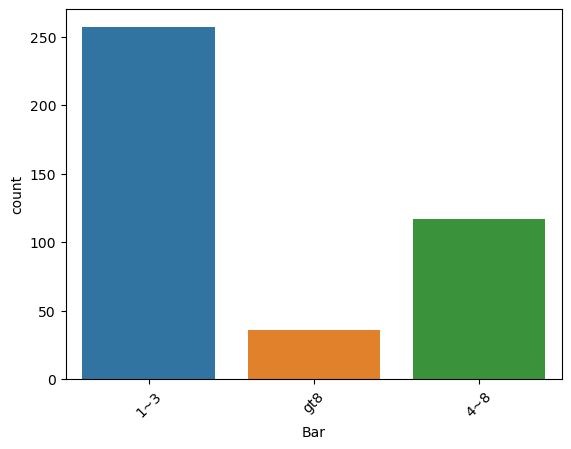

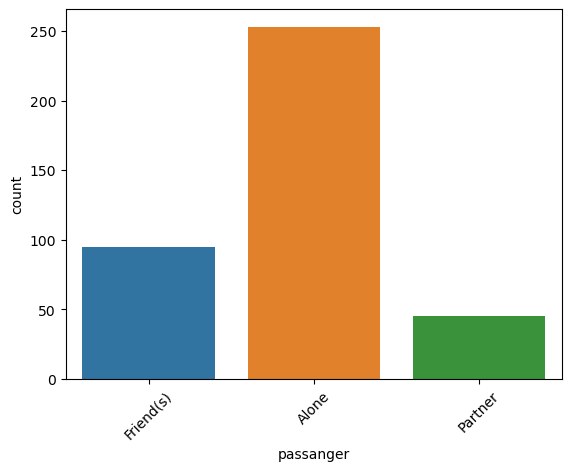

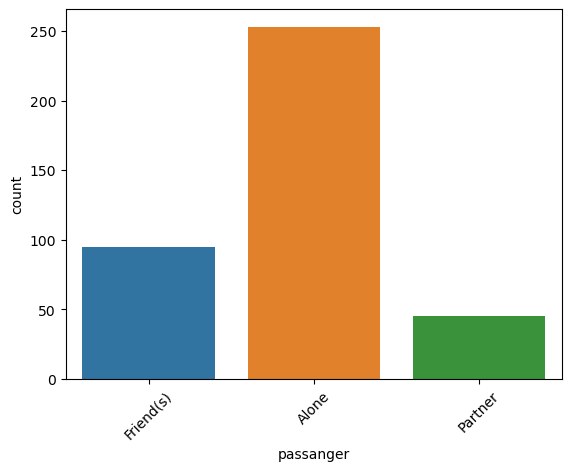

In [361]:
# create lists to be used in queries
list_bar_morethanonce = ["1~3","gt8","4~8"]
list_nonkidpassanger = ["Alone","Friend(s)","Partner"]
list_occupations = ["Farming Fishing & Forestry"]

# get accepted coupons by folks who visited bar once a month
once_month = accepted_bar.query('Bar in @list_of_bar')

# visualize the data of folks who visited bar once a month
fig = sns.countplot(x="Bar", data=once_month)
plt.xticks(rotation = 45)
plt.show(fig)

# visualize the data of folks who visited bar once a month and did not have kids in car
once_month_nonkidpassanger =  once_month.query('passanger in @list_nonkidpassanger')

fig = sns.countplot(x="passanger", data=once_month_nonkidpassanger)
plt.xticks(rotation = 45)
plt.show(fig)

# get accepted coupons by folks who visited bar once a month who are not in farming/fishing 
once_month_nonkidpassanger_nonfarm = once_month_nonkidpassanger.query('occupation not in @list_occupations')

#visualize accepted coupons by folks who visited bar once a month who are not in farming/fishing
fig = sns.countplot(x="passanger", data=once_month_nonkidpassanger_nonfarm)
plt.xticks(rotation = 45)
plt.show(fig)

In [345]:
#get counts and cross-check they are correct per visualizations
once_month.shape[0]

410

In [346]:
#get counts and cross-check they are correct per visualizations
once_month_nonkidpassanger.shape[0]

393

In [347]:
#get counts and cross-check they are correct per visualizations
once_month_nonkidpassanger_nonfarm.shape[0]

393

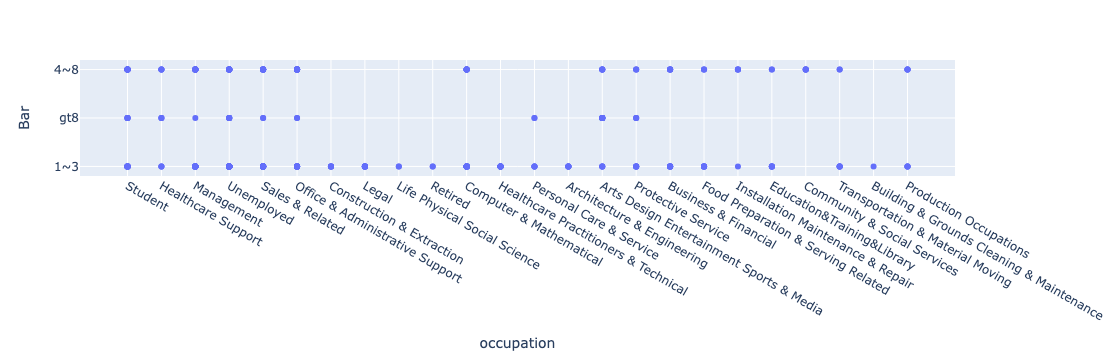

In [348]:
#visualize counts and and data spread for another perspective of data
px.scatter(once_month_nonkidpassanger_nonfarm, x = "occupation", y ="Bar")

In [349]:
#Calculate acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and 
#had occupations other than farming, fishing, or forestry. 

prop_accepted_5 = accepted_bar.shape[0] / once_month_nonkidpassanger_nonfarm.shape[0]
prop_accepted_5

# Conclusion : Half the folks who accepted bar coupons were drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

2.104325699745547

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [350]:
#Get unique marital statuses
accepted_bar['maritalStatus'].unique() 

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [363]:
#create list to be used in queries
list_Bar_morethanonce = ["1~3","gt8","4~8"]
list_passanger_nonkid = ["Alone","Friend(s)","Partner"]
list_maritalStatus_widow = ["Unmarried partner", "Single", "Married partner", "Divorced"]

#- get datafram for folks who go to bars more than once a month, had passengers that were not a kid, and were not widowed
once_month_nonkidpassanger_widow = accepted_bar.query('Bar in @list_of_bar').query("passanger in @list_passanger_nonkid").query("maritalStatus in @list_maritalStatus_widow")
once_month_nonkidpassanger_widow



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1


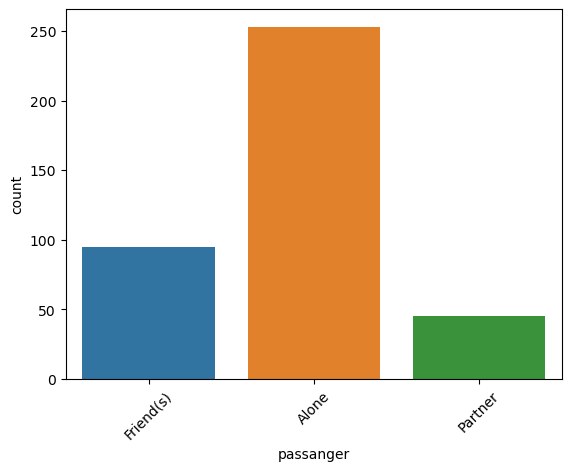

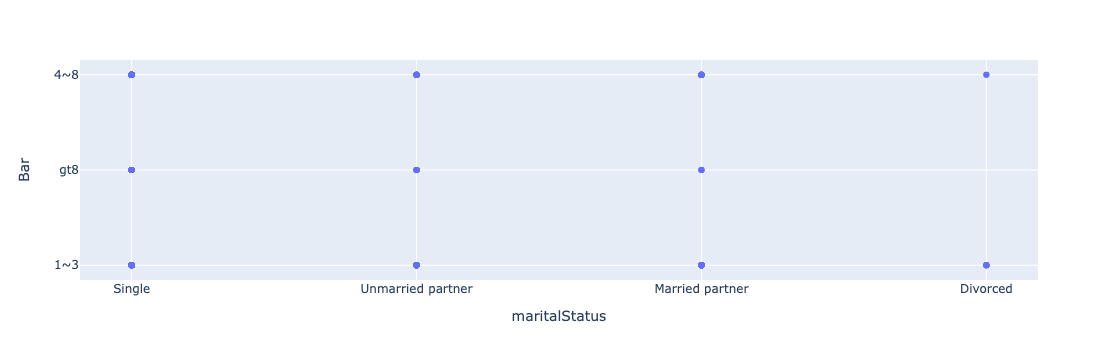

In [364]:
#visualize accepted coupons by those who go to bars more than once a month, had passengers that were not a kid, and were not widowed
fig = sns.countplot(x="passanger", data=once_month_nonkidpassanger_widow)
plt.xticks(rotation = 45)
plt.show(fig)

#visualize scatter plots
px.scatter(once_month_nonkidpassanger_widow, x = "maritalStatus", y ="Bar")

In [365]:
#Calculate acceptance rate between drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

prop_accepted_6 = accepted_bar.shape[0] / once_month_nonkidpassanger_widow.shape[0]
prop_accepted_6

# Conclusion : Half the folks who accepted bar coupons were drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

2.104325699745547

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Conclusion -1 : a third of total accepted folks are over 25 and go to bar once a month
# Conclusion -2 : Half the folks who accepted bar coupons were drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
# Conclusion -3 : Half the folks who accepted bar coupons were drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  